In [1]:
  import sys
import platform
import os

# Print Python version details
print("Python version:", sys.version)
print("Python version info:", sys.version_info)
print("Platform:", platform.platform())

# Check for Conda environment; CONDA_DEFAULT_ENV is set when using Conda
conda_env = os.environ.get("CONDA_DEFAULT_ENV", "Not running in a Conda environment")
print("Current Conda Environment:", conda_env)


Python version: 3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Python version info: sys.version_info(major=3, minor=9, micro=21, releaselevel='final', serial=0)
Platform: Windows-10-10.0.26200-SP0
Current Conda Environment: ML_DL


In [2]:
import pandas as pd

# Read the CSV file into a DataFrame. Adjust the file path if necessary.
df = pd.read_csv("SitToStand_human_labels.csv")

print(df["On_or_Off_medication"].nunique())
print(df["On_or_Off_medication"].unique())
print(df["On_or_Off_medication"].value_counts())

4
['On medication' 'Off medication' 'Control' '-']
On_or_Off_medication
Control           170
On medication     139
Off medication     68
-                  26
Name: count, dtype: int64


In [3]:
print(df["DBS_state"].nunique())
print(df["DBS_state"].unique())
print(df["DBS_state"].value_counts())

4
['-' 'Control' 'On DBS' 'Off DBS']
DBS_state
Control    170
-          149
On DBS      67
Off DBS     17
Name: count, dtype: int64


In [4]:
print(df["Clinical_assessment"].nunique())
print(df["Clinical_assessment"].unique())
print(df["Clinical_assessment"].value_counts())

2
['Yes' 'No']
Clinical_assessment
Yes    261
No     142
Name: count, dtype: int64


In [5]:
print(df["PD_or_C"].nunique())
print(df["PD_or_C"].unique())
print(df["PD_or_C"].value_counts())

2
['PD' 'C']
PD_or_C
PD    233
C     170
Name: count, dtype: int64


In [6]:

print(df["MDS-UPDRS_score_3.9 _arising_from_chair"].nunique())
print(df["MDS-UPDRS_score_3.9 _arising_from_chair"].unique())
print(df["MDS-UPDRS_score_3.9 _arising_from_chair"].value_counts())

5
[ 0.  2.  1. nan  3.  4.]
MDS-UPDRS_score_3.9 _arising_from_chair
0.0    197
2.0    152
1.0     38
3.0      8
4.0      1
Name: count, dtype: int64


In [7]:
print(df["STS_additional_features"].nunique())
print(df["STS_additional_features"].unique())
print(df["STS_additional_features"].value_counts())

23
[nan 'Uses arms of chair' 'Slow' 'Carrying something'
 '>1 attempt\nmoves forward in chair\nCarrying something'
 'Uses arms of chair\nSlow' 'Carrying something\nSlow'
 'Slow\nUses arms of chair' 'Moves forward in chair\nUses arms of chair'
 'Slow\n>1 attempt' 'Uses arms of chair\nSlow\n>1 attempt' '>1 attempt'
 'Uses arms of chair\nCarrying something' '>1 attempt\nSlow'
 'Slow\n>1 attempt\nMoves forward in chair\nUses arms of chair'
 'Uses arms of chair\nSlow\n>1 attempt\nMoves forward in chair'
 'Tends to fall back' 'Uses arms of chair\n>1 attempt'
 'Slow\nUses arms of chair\nUnable to arise without help'
 'Uses arms of chair\nTends to fall back'
 'Uses arms of chair\nCarrying something\nSlow'
 'Uses arms of chair\nSlow\nCarrying something' 'Slow\nCarrying something'
 'Slow\nUses arms of chair\nCarrying something\n>1 attempt']
STS_additional_features
Uses arms of chair                                              89
Uses arms of chair\nSlow                                        43

In [8]:
print(df["Participant ID number"].nunique())
print(df["Participant ID number"].unique())
print(df["Participant ID number"].value_counts())

24
[596 227 275 325 405 412 884 631 396 204 842 230 324 400 467 634 744 784
 398 495 253 416 384 971]
Participant ID number
230    30
842    28
275    26
744    26
396    21
596    21
412    20
784    19
253    19
384    18
467    17
971    15
884    15
204    15
634    15
324    14
405    13
325    12
631    12
400    11
398    11
495     9
227     8
416     8
Name: count, dtype: int64


In [9]:
import pandas as pd

# Remove rows where medication status is missing ("-"):
df = df[df["On_or_Off_medication"] != "-"]

# Drop rows with missing values (if any):
df = df.dropna(subset=["MDS-UPDRS_score_3.9 _arising_from_chair"])

# Replace "-" with "Off DBS"
df["DBS_state"] = df["DBS_state"].replace("-", "Off DBS")

print(df.head())


   Transition ID  Participant ID number PD_or_C  sts_whole_episode_duration  \
0              1                    596      PD                    1.748000   
1              2                    596      PD                    2.085000   
2              3                    596      PD                    2.610000   
3              4                    596      PD                    2.478999   
4              5                    596      PD                    1.268000   

   sts_final_attempt_duration On_or_Off_medication DBS_state  \
0                    1.209000        On medication   Off DBS   
1                    1.076999        On medication   Off DBS   
2                    1.067999        On medication   Off DBS   
3                    1.233000        On medication   Off DBS   
4                    0.801000        On medication   Off DBS   

  Clinical_assessment STS_additional_features  \
0                 Yes                     NaN   
1                 Yes                     

In [10]:
# Step 1: Fill NaNs with empty string
df["STS_additional_features"] = df["STS_additional_features"].fillna("")

# Step 2: Split the labels by line breaks
df["STS_features_list"] = df["STS_additional_features"].apply(lambda x: x.split('\n') if x else [])

# Step 3: Get all unique sub-features
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
features_encoded = pd.DataFrame(mlb.fit_transform(df["STS_features_list"]),
                                 columns=mlb.classes_,
                                 index=df.index)

# Step 4: Concatenate with original dataframe
df = pd.concat([df, features_encoded], axis=1)


In [11]:
print(df.columns.tolist())
print(df["STS_features_list"].head())
print(df.loc[87, "STS_features_list"])
# sts_binary_features = [
#     '>1 attempt', 'Carrying something', 'Moves forward in chair', 'Slow',
#     'Tends to fall back', 'Unable to arise without help', 'Uses arms of chair', 'moves forward in chair'
# ]

['Transition ID', 'Participant ID number', 'PD_or_C', 'sts_whole_episode_duration', 'sts_final_attempt_duration', 'On_or_Off_medication', 'DBS_state', 'Clinical_assessment', 'STS_additional_features', 'MDS-UPDRS_score_3.9 _arising_from_chair', 'STS_features_list', '>1 attempt', 'Carrying something', 'Moves forward in chair', 'Slow', 'Tends to fall back', 'Unable to arise without help', 'Uses arms of chair', 'moves forward in chair']
0                      []
1                      []
2    [Uses arms of chair]
3                  [Slow]
4                      []
Name: STS_features_list, dtype: object
['Uses arms of chair', 'Slow', '>1 attempt']


In [13]:
# Filter for PD patients who are on medication.
pd_on_med = df[(df["PD_or_C"] == "PD") & (df["On_or_Off_medication"] == "On medication")]

# Filter for PD patients who are off medication.
pd_off_med = df[(df["PD_or_C"] == "PD") & (df["On_or_Off_medication"] == "Off medication")]

# Optionally, preview the filtered DataFrames.
print("PD on medication:")
print(pd_on_med.head())

print("\nPD off medication:")
print(pd_off_med.head())

PD on medication:
   Transition ID  Participant ID number PD_or_C  sts_whole_episode_duration  \
0              1                    596      PD                    1.748000   
1              2                    596      PD                    2.085000   
2              3                    596      PD                    2.610000   
3              4                    596      PD                    2.478999   
4              5                    596      PD                    1.268000   

   sts_final_attempt_duration On_or_Off_medication DBS_state  \
0                    1.209000        On medication   Off DBS   
1                    1.076999        On medication   Off DBS   
2                    1.067999        On medication   Off DBS   
3                    1.233000        On medication   Off DBS   
4                    0.801000        On medication   Off DBS   

  Clinical_assessment STS_additional_features  \
0                 Yes                           
1                 Yes   

In [14]:
# Filter groups
on_med_off_dbs = df[(df['On_or_Off_medication'] == 'On medication') & (df['DBS_state'] == 'Off DBS')]
off_med_on_dbs = df[(df['On_or_Off_medication'] == 'Off medication') & (df['DBS_state'] == 'On DBS')]
on_med_on_dbs = df[(df['On_or_Off_medication'] == 'On medication') & (df['DBS_state'] == 'On DBS')]
off_med_off_dbs = df[(df['On_or_Off_medication'] == 'Off medication') & (df['DBS_state'] == 'Off DBS')]

# Optional: Display counts
print("On Medication & On DBS:", len(on_med_on_dbs))
print("On Medication & Off DBS:", len(on_med_off_dbs))
print("Off Medication & On DBS:", len(off_med_on_dbs))
print("Off Medication & Off DBS:", len(off_med_off_dbs))

On Medication & On DBS: 31
On Medication & Off DBS: 106
Off Medication & On DBS: 14
Off Medication & Off DBS: 54


In [15]:
# Count unique participants in each group
print("On Medication & On DBS:", on_med_on_dbs["Participant ID number"].nunique())
print("On Medication & Off DBS:", on_med_off_dbs["Participant ID number"].nunique())
print("Off Medication & On DBS:", off_med_on_dbs["Participant ID number"].nunique())
print("Off Medication & Off DBS:", off_med_off_dbs["Participant ID number"].nunique())
print("Participants (On Med & On DBS):", on_med_on_dbs["Participant ID number"].unique())
print("Participants (On Med & Off DBS):", on_med_off_dbs["Participant ID number"].unique())
print("Participants (Off Med & On DBS):", off_med_on_dbs["Participant ID number"].unique())
print("Participants (Off Med & Off DBS):", off_med_off_dbs["Participant ID number"].unique())


On Medication & On DBS: 3
On Medication & Off DBS: 8
Off Medication & On DBS: 2
Off Medication & Off DBS: 11
Participants (On Med & On DBS): [631 842 384]
Participants (On Med & Off DBS): [596 412 396 324 467 744 398 253]
Participants (Off Med & On DBS): [842 384]
Participants (Off Med & Off DBS): [596 412 631 396 842 324 467 744 398 253 384]


In [16]:
# On Medication & On DBS
print("On Medication & On DBS:")
print(on_med_on_dbs[['Participant ID number', 'Transition ID']].drop_duplicates())

# On Medication & Off DBS
print("\nOn Medication & Off DBS:")
print(on_med_off_dbs[['Participant ID number', 'Transition ID']].drop_duplicates())

# Off Medication & On DBS
print("\nOff Medication & On DBS:")
print(off_med_on_dbs[['Participant ID number', 'Transition ID']].drop_duplicates())

# Off Medication & Off DBS
print("\nOff Medication & Off DBS:")
print(off_med_off_dbs[['Participant ID number', 'Transition ID']].drop_duplicates())


On Medication & On DBS:
     Participant ID number  Transition ID
115                    631            234
116                    631            235
117                    631            237
118                    631            238
119                    631            239
120                    631            242
125                    631            258
126                    631            263
163                    842            329
164                    842            330
165                    842            331
166                    842            332
167                    842            333
168                    842            334
169                    842            335
170                    842            336
171                    842            337
183                    842            362
184                    842            363
185                    842            364
186                    842            365
187                    842            366
188       

In [17]:
score_col = 'MDS-UPDRS_score_3.9 _arising_from_chair'

# Group by score and count unique patients
score_patient_counts = df.groupby(score_col)['Participant ID number'].nunique()

# Show the result
print("Number of unique patients for each score:")
print(score_patient_counts)


Number of unique patients for each score:
MDS-UPDRS_score_3.9 _arising_from_chair
0.0    23
1.0    10
2.0    20
3.0     4
4.0     1
Name: Participant ID number, dtype: int64


In [18]:
score_col = 'MDS-UPDRS_score_3.9 _arising_from_chair'

# Filter for PD patients
df_pd = df[df['PD_or_C'] == 'PD']

# Count records per score
pd_score_record_counts = df_pd[score_col].value_counts().sort_index()

print("PD Patients – Number of records for each score:")
print(pd_score_record_counts)

PD Patients – Number of records for each score:
MDS-UPDRS_score_3.9 _arising_from_chair
0.0    77
1.0    30
2.0    90
3.0     7
4.0     1
Name: count, dtype: int64


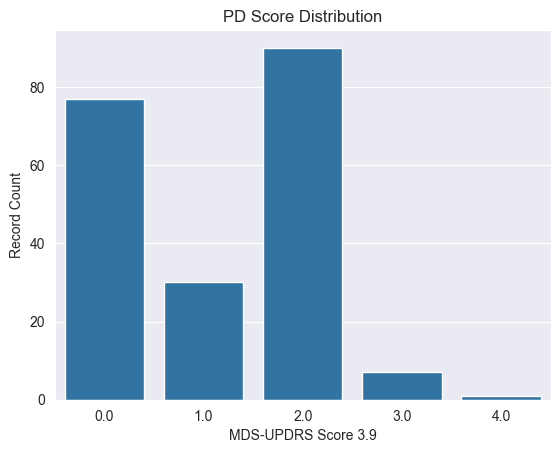

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df[df['PD_or_C'] == 'PD'], x='MDS-UPDRS_score_3.9 _arising_from_chair')
plt.title("PD Score Distribution")
plt.ylabel("Record Count")
plt.xlabel("MDS-UPDRS Score 3.9")
plt.show()


In [20]:
# Compare average performance scores (replace 'your_metric_column' with an actual metric like 'STS_score')
print("Mean STS Score OnMed-OnDBS:", on_med_on_dbs['MDS-UPDRS_score_3.9 _arising_from_chair'].mean())
print("Mean STS Score OnMed-OffDBS:", on_med_off_dbs['MDS-UPDRS_score_3.9 _arising_from_chair'].mean())
print("Mean STS Score OffMed-OnDBS:", off_med_on_dbs['MDS-UPDRS_score_3.9 _arising_from_chair'].mean())
print("Mean STS Score OffMed-OffDBS:", off_med_off_dbs['MDS-UPDRS_score_3.9 _arising_from_chair'].mean())


Mean STS Score OnMed-OnDBS: 1.2903225806451613
Mean STS Score OnMed-OffDBS: 1.0943396226415094
Mean STS Score OffMed-OnDBS: 1.8571428571428572
Mean STS Score OffMed-OffDBS: 0.9814814814814815


In [21]:
print(df.columns)

Index(['Transition ID', 'Participant ID number', 'PD_or_C',
       'sts_whole_episode_duration', 'sts_final_attempt_duration',
       'On_or_Off_medication', 'DBS_state', 'Clinical_assessment',
       'STS_additional_features', 'MDS-UPDRS_score_3.9 _arising_from_chair',
       'STS_features_list', '>1 attempt', 'Carrying something',
       'Moves forward in chair', 'Slow', 'Tends to fall back',
       'Unable to arise without help', 'Uses arms of chair',
       'moves forward in chair'],
      dtype='object')


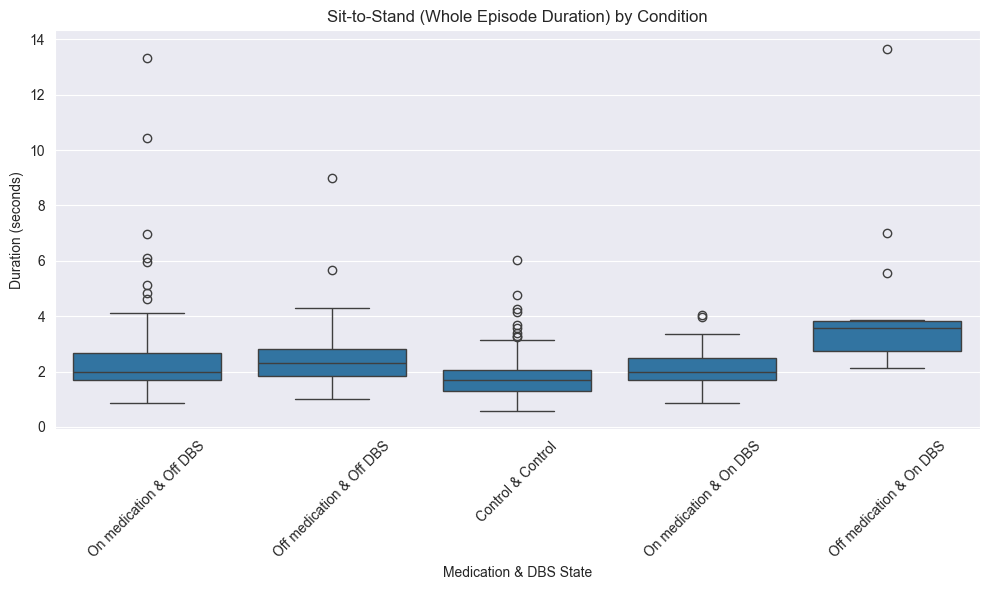

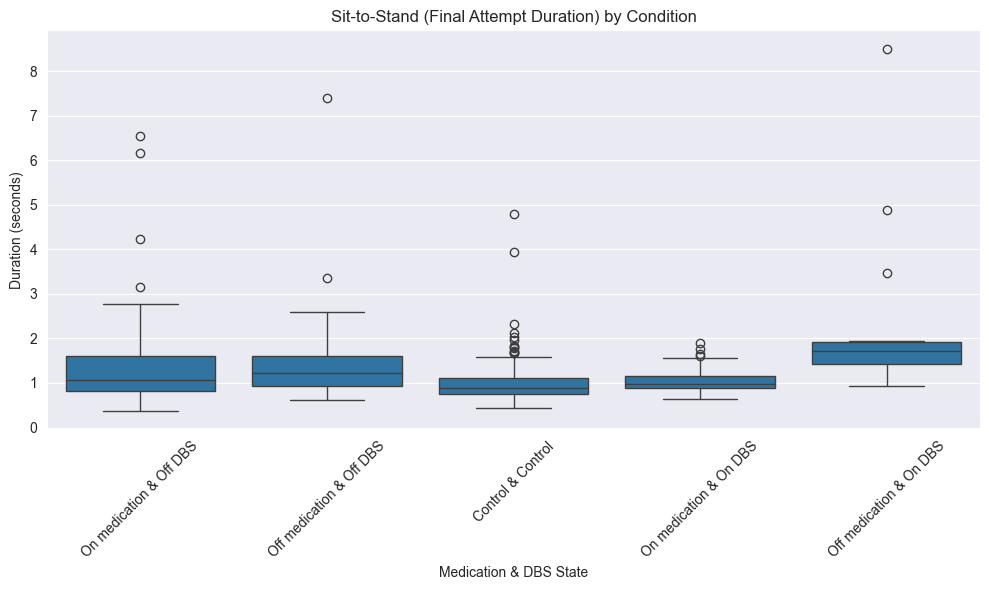

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add condition column
df['Condition'] = df['On_or_Off_medication'] + ' & ' + df['DBS_state']

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Condition', y='sts_whole_episode_duration')
plt.xticks(rotation=45)
plt.title("Sit-to-Stand (Whole Episode Duration) by Condition")
plt.ylabel("Duration (seconds)")
plt.xlabel("Medication & DBS State")
plt.tight_layout()
plt.show()


# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Condition', y='sts_final_attempt_duration')
plt.xticks(rotation=45)
plt.title("Sit-to-Stand (Final Attempt Duration) by Condition")
plt.ylabel("Duration (seconds)")
plt.xlabel("Medication & DBS State")
plt.tight_layout()
plt.show()

In [23]:
df.head()

,Transition ID,Participant ID number,PD_or_C,sts_whole_episode_duration,sts_final_attempt_duration,On_or_Off_medication,DBS_state,Clinical_assessment,STS_additional_features,MDS-UPDRS_score_3.9 _arising_from_chair,STS_features_list,>1 attempt,Carrying something,Moves forward in chair,Slow,Tends to fall back,Unable to arise without help,Uses arms of chair,moves forward in chair,Condition
0,1,596,PD,1.748000,1.209000,On medication,Off DBS,Yes,,0.0,[],0,0,0,0,0,0,0,0,On medication & Off DBS
1,2,596,PD,2.085000,1.076999,On medication,Off DBS,Yes,,0.0,[],0,0,0,0,0,0,0,0,On medication & Off DBS
2,3,596,PD,2.610000,1.067999,On medication,Off DBS,Yes,Uses arms of chair,2.0,[Uses arms of chair],0,0,0,0,0,0,1,0,On medication & Off DBS
3,4,596,PD,2.478999,1.233000,On medication,Off DBS,Yes,Slow,1.0,[Slow],0,0,0,1,0,0,0,0,On medication & Off DBS
4,5,596,PD,1.268000,0.801000,On medication,Off DBS,Yes,,0.0,[],0,0,0,0,0,0,0,0,On medication & Off DBS


In [24]:
# 1. Number of unique participants by group
num_participants = df.groupby('PD_or_C')['Participant ID number'].nunique()
print("Number of unique participants:")
print(num_participants)

# 2. Number of rows (i.e., tests / transitions) by group
num_rows = df['PD_or_C'].value_counts()
print("\nNumber of test rows:")
print(num_rows)


Number of unique participants:
PD_or_C
C     12
PD    11
Name: Participant ID number, dtype: int64

Number of test rows:
PD_or_C
PD    205
C     165
Name: count, dtype: int64


In [25]:
print(df.columns)

# Column to check for outliers
col = 'sts_whole_episode_duration'

# Initialize empty list to collect outlier rows
outlier_rows = []

# Group by condition and apply IQR-based filtering
for condition, group in df.groupby('Condition'):
    Q1 = group[col].quantile(0.25)
    Q3 = group[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Find outliers in this condition group
    condition_outliers = group[(group[col] < lower) | (group[col] > upper)]
    outlier_rows.append(condition_outliers)

# Concatenate all outlier rows
outliers = pd.concat(outlier_rows)

# Show results
print(f"Total outliers found: {len(outliers)}")
print(outliers[['Transition ID', 'Participant ID number', 'PD_or_C', 'Condition', col]])


Index(['Transition ID', 'Participant ID number', 'PD_or_C',
       'sts_whole_episode_duration', 'sts_final_attempt_duration',
       'On_or_Off_medication', 'DBS_state', 'Clinical_assessment',
       'STS_additional_features', 'MDS-UPDRS_score_3.9 _arising_from_chair',
       'STS_features_list', '>1 attempt', 'Carrying something',
       'Moves forward in chair', 'Slow', 'Tends to fall back',
       'Unable to arise without help', 'Uses arms of chair',
       'moves forward in chair', 'Condition'],
      dtype='object')
Total outliers found: 24
     Transition ID  Participant ID number PD_or_C                 Condition  \
55             102                    325       C         Control & Control   
61             111                    325       C         Control & Control   
77             160                    405       C         Control & Control   
103            217                    884       C         Control & Control   
203            401                    230       C   

In [26]:
print("Unique Transition IDs:", outliers['Transition ID'].nunique())
print("Unique Participant IDs:", outliers['Participant ID number'].nunique())

Unique Transition IDs: 24
Unique Participant IDs: 11


In [27]:

# Python
import pandas as pd
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Example: Assume pd_on_med is your DataFrame
# and 'MDS-UPDRS_score_3.9 _arising_from_chair' is your target.
X = pd_on_med.drop(columns=['MDS-UPDRS_score_3.9 _arising_from_chair'])
y = pd_on_med['MDS-UPDRS_score_3.9 _arising_from_chair']

# The current distribution of classes
print("Original class distribution:", Counter(y))

# Initialize the oversampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({2.0: 58, 0.0: 53, 1.0: 19, 3.0: 7})
Resampled class distribution: Counter({0.0: 58, 2.0: 58, 1.0: 58, 3.0: 58})


D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [49]:
# Python Original Method : sts additional features not included.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Drop rows with missing values for the required columns
data = pd_on_med.dropna(subset=[
    "MDS-UPDRS_score_3.9 _arising_from_chair",
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",
    "Clinical_assessment"
])

# Define features and target
X = data[[
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",  # Categorical predictor
    "Clinical_assessment"  # Categorical predictor
]]
y = data["MDS-UPDRS_score_3.9 _arising_from_chair"].astype(int)  # Ensure the target is integer

# Convert categorical predictors to dummy variables
X_encoded = pd.get_dummies(X, columns=["DBS_state", "Clinical_assessment"], drop_first=True)

# Split data into training and testing sets (test set maintains real distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Apply oversampling only on the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize and train a Decision Tree Classifier with the resampled training data
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model using accuracy and a confusion matrix
accuracy = accuracy_score(y_test, y_pred )
conf_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 0.4642857142857143
Confusion Matrix:
 [[6 0 3 1]
 [1 1 0 0]
 [5 4 5 0]
 [0 1 0 1]]


D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(



Feature Importance (Decision Tree - Original Features):
sts_whole_episode_duration    0.624135
sts_final_attempt_duration    0.258671
Clinical_assessment_Yes       0.082256
DBS_state_On DBS              0.034939
dtype: float64


C:\Users\Kaiyang\AppData\Local\Temp\ipykernel_33872\2528985702.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis') # Or use 'Blues_d', 'skyblue'


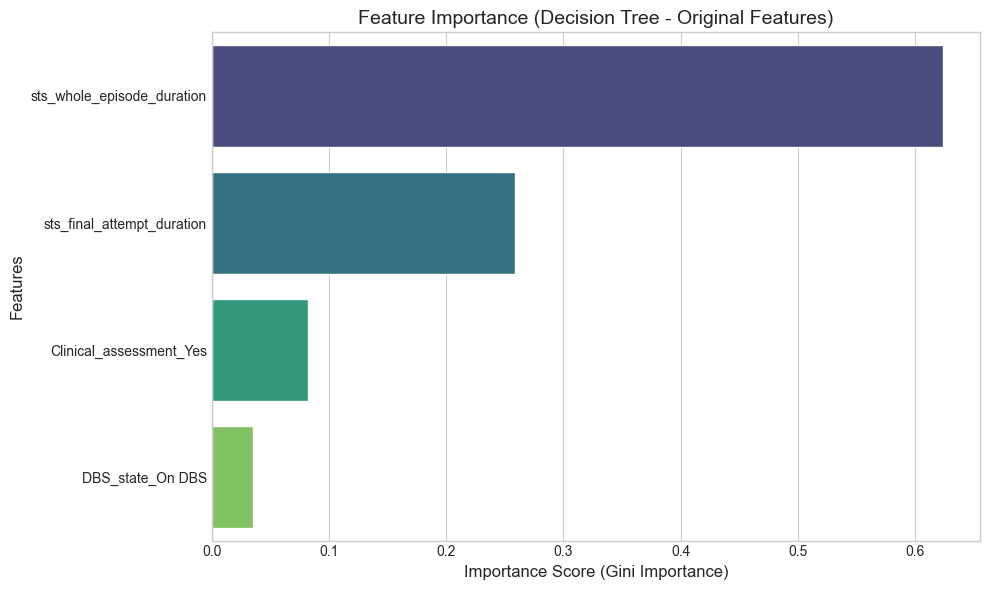

In [50]:
# --- Feature Importance Plotting ---

# Get feature importances from THIS specific classifier
importances = pd.Series(classifier.feature_importances_, index=X_encoded.columns) # Use the correct columns
importances = importances.sort_values(ascending=False)

print("\nFeature Importance (Decision Tree - Original Features):")
print(importances)

# Set a professional style
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6)) # Adjust size as needed

# Create the bar plot
sns.barplot(x=importances.values, y=importances.index, palette='viridis') # Or use 'Blues_d', 'skyblue'

plt.title("Feature Importance (Decision Tree - Original Features)", fontsize=14)
plt.xlabel("Importance Score (Gini Importance)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save the figure (optional)
plt.savefig("feature_importance_dt_original_thesis.png", dpi=300, bbox_inches='tight')

plt.show()

In [51]:
# Python New Method : sts additional features included. DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Drop rows with missing required values
pd_on_med_clean = pd_on_med.dropna(subset=[
    "MDS-UPDRS_score_3.9 _arising_from_chair",
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",
    "Clinical_assessment"
])

# Define base features
base_features = [
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",
    "Clinical_assessment"
]

# These are the multi-label binary features from STS_additional_features
sts_binary_features = list(mlb.classes_)
# sts_binary_features = [
#     '>1 attempt', 'Carrying something', 'Moves forward in chair', 'Slow',
#     'Tends to fall back', 'Unable to arise without help', 'Uses arms of chair', 'moves forward in chair'
# ]

# Combine all features
all_features = base_features + sts_binary_features

# Define features and target
X = pd_on_med_clean[all_features]
y = pd_on_med_clean["MDS-UPDRS_score_3.9 _arising_from_chair"].astype(int)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=["DBS_state", "Clinical_assessment"], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Oversample training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train decision tree model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("DecisionTreeClassifier Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)


DecisionTreeClassifier Accuracy: 0.9642857142857143
Confusion Matrix:
 [[10  0  0  0]
 [ 0  2  0  0]
 [ 0  0 14  0]
 [ 0  0  1  1]]


D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(



Feature Importance (Decision Tree - With STS Features):
Uses arms of chair              0.333333
Slow                            0.290780
Moves forward in chair          0.220126
>1 attempt                      0.113208
sts_whole_episode_duration      0.042553
sts_final_attempt_duration      0.000000
Carrying something              0.000000
Tends to fall back              0.000000
Unable to arise without help    0.000000
moves forward in chair          0.000000
DBS_state_On DBS                0.000000
Clinical_assessment_Yes         0.000000
dtype: float64


C:\Users\Kaiyang\AppData\Local\Temp\ipykernel_33872\3797676621.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis') # Or 'Blues_d', 'skyblue'


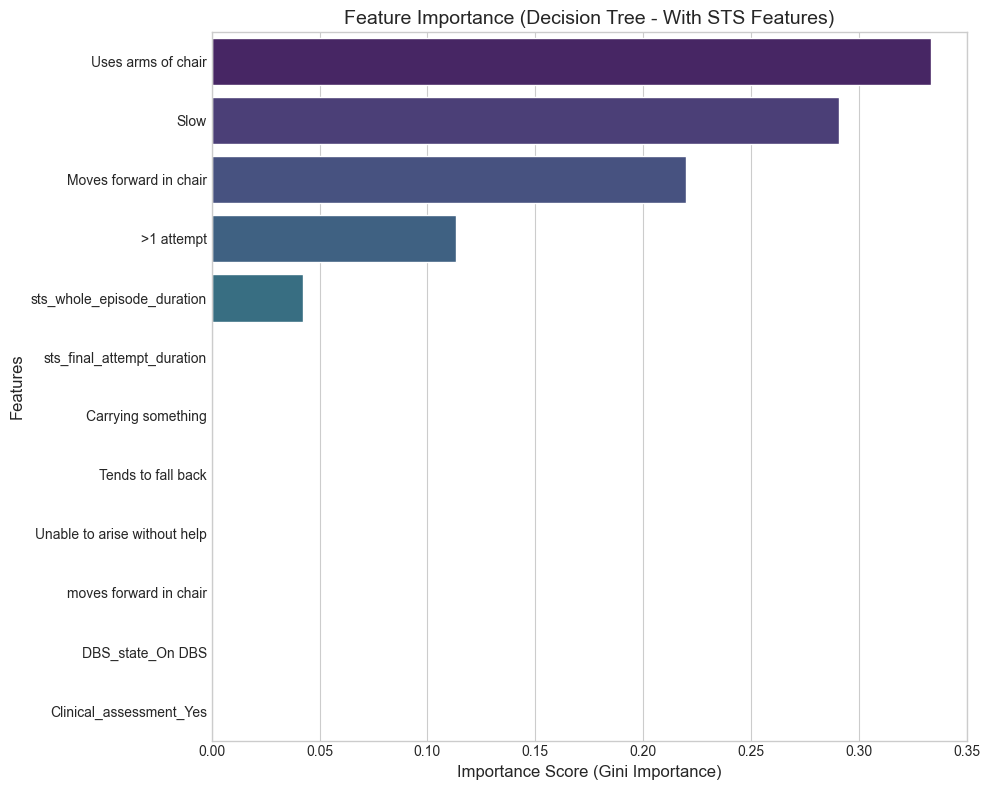

In [53]:
# --- Feature Importance Plotting ---

# Get feature importances from THIS specific classifier
importances = pd.Series(classifier.feature_importances_, index=X_encoded.columns) # Use the correct columns
importances = importances.sort_values(ascending=False)

print("\nFeature Importance (Decision Tree - With STS Features):")
print(importances)

# Set a professional style
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 8)) # Adjusted size for potentially more features

# Create the bar plot
sns.barplot(x=importances.values, y=importances.index, palette='viridis') # Or 'Blues_d', 'skyblue'

plt.title("Feature Importance (Decision Tree - With STS Features)", fontsize=14)
plt.xlabel("Importance Score (Gini Importance)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save the figure (optional)
plt.savefig("feature_importance_dt_sts_thesis.png", dpi=300, bbox_inches='tight')

plt.show()

In [55]:
# Python New Method : sts additional features included. RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Drop rows with missing required values
pd_on_med_clean = pd_on_med.dropna(subset=[
    "MDS-UPDRS_score_3.9 _arising_from_chair",
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",
    "Clinical_assessment"
])

# Define base features
base_features = [
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",
    "Clinical_assessment"
]

# These are the multi-label binary features from STS_additional_features
sts_binary_features = list(mlb.classes_)
# sts_binary_features = [
#     '>1 attempt', 'Carrying something', 'Moves forward in chair', 'Slow',
#     'Tends to fall back', 'Unable to arise without help', 'Uses arms of chair', 'moves forward in chair'
# ]

# Combine all features
all_features = base_features + sts_binary_features

# Define features and target
X = pd_on_med_clean[all_features]
y = pd_on_med_clean["MDS-UPDRS_score_3.9 _arising_from_chair"].astype(int)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=["DBS_state", "Clinical_assessment"], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Oversample training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

# Train random forest model with class_weight to handle imbalance
model = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest (default: 100)
    class_weight='balanced',  # Automatically adjusts weights inversely proportional to class frequencies
    random_state=42
)

# Fit the model on the oversampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("RandomForestClassifier Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)



RandomForestClassifier Accuracy: 0.9642857142857143
Confusion Matrix:
 [[10  0  0  0]
 [ 0  2  0  0]
 [ 0  0 14  0]
 [ 0  0  1  1]]


D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(



Feature Importance (Random Forest - With STS Features):
Uses arms of chair              0.322447
sts_whole_episode_duration      0.143544
Slow                            0.125100
sts_final_attempt_duration      0.124824
Moves forward in chair          0.113919
>1 attempt                      0.084923
Clinical_assessment_Yes         0.044673
DBS_state_On DBS                0.021931
Carrying something              0.018637
Tends to fall back              0.000000
Unable to arise without help    0.000000
moves forward in chair          0.000000
dtype: float64


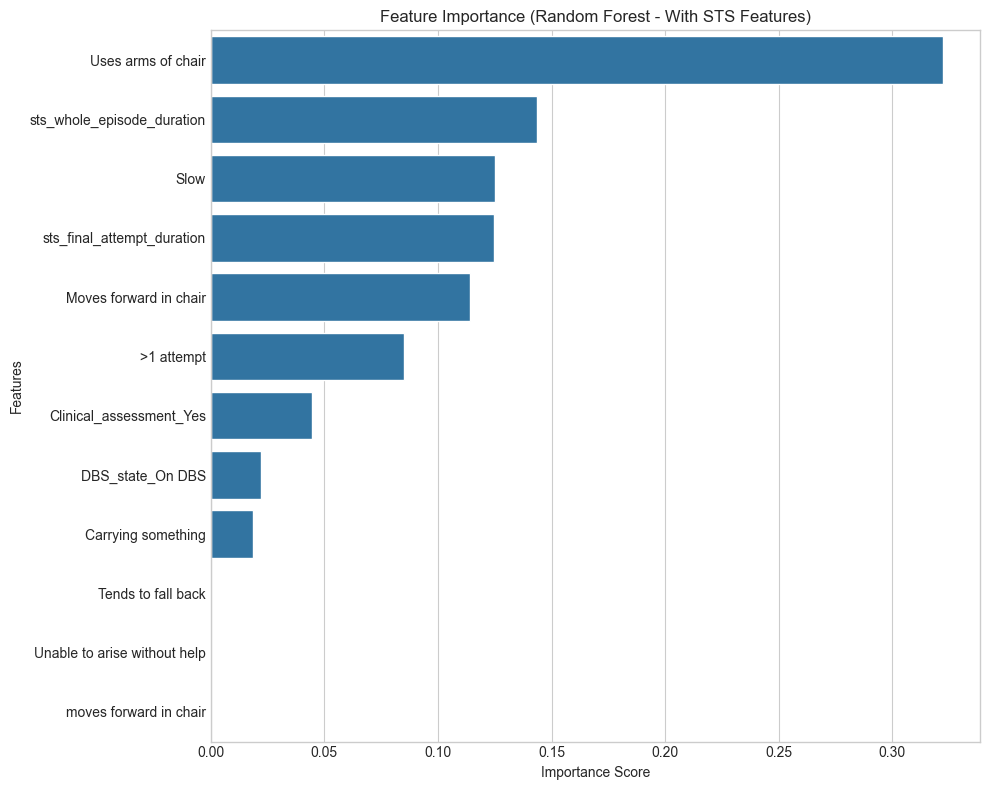

In [56]:
# Feature Importance for Random Forest (With STS Features)
import seaborn as sns

importances_rf_sts = pd.Series(model.feature_importances_, index=X_encoded.columns)
importances_rf_sts = importances_rf_sts.sort_values(ascending=False)

print("\nFeature Importance (Random Forest - With STS Features):")
print(importances_rf_sts)

# Plotting
plt.figure(figsize=(10, 8))  # Adjusted figure size for more features
sns.barplot(x=importances_rf_sts.values, y=importances_rf_sts.index)
plt.title("Feature Importance (Random Forest - With STS Features)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [57]:
# Step 7.5: Attach ID info to test set for comparison
# We'll assume 'Transition ID' and 'Participant ID number' are in pd_on_med_clean

# Get the indices of the test set from the original dataframe
X_test_ids = X_test.index  # indices from original df
id_info = pd_on_med_clean.loc[X_test_ids, ["Transition ID", "Participant ID number"]].copy()
id_info["Actual"] = y_test.values
id_info["Predicted"] = y_pred

# Find mismatches
wrong_preds = id_info[id_info["Actual"] != id_info["Predicted"]]

# Show or export the wrong predictions
print("\n❌ Wrong Predictions:")
print(wrong_preds)

# Optional: Save to CSV
wrong_preds.to_csv("wrong_predictions.csv", index=False)
print("Wrong predictions saved to 'wrong_predictions.csv'")



❌ Wrong Predictions:
     Transition ID  Participant ID number  Actual  Predicted
190            369                    842       3          2
Wrong predictions saved to 'wrong_predictions.csv'


In [58]:
X_encoded.head()


,sts_whole_episode_duration,sts_final_attempt_duration,>1 attempt,Carrying something,Moves forward in chair,Slow,Tends to fall back,Unable to arise without help,Uses arms of chair,moves forward in chair,DBS_state_On DBS,Clinical_assessment_Yes
0,1.748000,1.209000,0,0,0,0,0,0,0,0,False,True
1,2.085000,1.076999,0,0,0,0,0,0,0,0,False,True
2,2.610000,1.067999,0,0,0,0,0,0,1,0,False,True
3,2.478999,1.233000,0,0,0,1,0,0,0,0,False,True
4,1.268000,0.801000,0,0,0,0,0,0,0,0,False,True


In [59]:
filtered_rows = df[
    (df["Uses arms of chair"] == 1) &
    (df["Tends to fall back"] == 1)
][["Participant ID number", "Transition ID"]]

print(filtered_rows)


     Participant ID number  Transition ID
190                    842            369


In [60]:
# RandomForestClassifier Model original without ramdomoversample
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming pd_on_med is already defined as your filtered DataFrame

# Drop rows with missing values
data = pd_on_med.dropna(subset=[
    "MDS-UPDRS_score_3.9 _arising_from_chair",
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",
    "Clinical_assessment"
])

# Define features and target
X = data[[
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",  # Categorical predictor
    "Clinical_assessment"  # Categorical predictor
]]
y = data["MDS-UPDRS_score_3.9 _arising_from_chair"]

# Ensure the target is integer (0 to 4)
y = y.astype(int)

# Convert categorical predictors to dummy variables
X_encoded = pd.get_dummies(X, columns=["DBS_state", "Clinical_assessment"], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Initialize and train a RandomForestClassifier
rf_classifier_1 = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier_1.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier_1.predict(X_test)

# Evaluate the model performance using accuracy and a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 0.6785714285714286
Confusion Matrix:
 [[10  0  0  0]
 [ 0  0  2  0]
 [ 5  1  8  0]
 [ 0  0  1  1]]


In [39]:
# Python New Method : sts additional features included. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Step 1: Define features and target
X = pd_on_med_clean[all_features]
y = pd_on_med_clean["MDS-UPDRS_score_3.9 _arising_from_chair"].astype(int)

# Step 2: One-hot encode DBS_state and Clinical_assessment
X_encoded = pd.get_dummies(X, columns=["DBS_state", "Clinical_assessment"], drop_first=True)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Step 4: Apply oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Step 5: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Predict and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Step 7: Show results
print("Random Forest Classifier Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)


Random Forest Classifier Accuracy: 0.9642857142857143
Confusion Matrix:
 [[10  0  0  0]
 [ 0  2  0  0]
 [ 0  0 14  0]
 [ 0  0  1  1]]


D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [40]:
# Python  RandomForestClassifier Model with oversampling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Drop rows with missing values for the selected features and target
data = pd_on_med.dropna(subset=[
    "MDS-UPDRS_score_3.9 _arising_from_chair",
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",
    "Clinical_assessment"
])

# Define features and target
X = data[[
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",  # Categorical predictor
    "Clinical_assessment"  # Categorical predictor
]]

y = data["MDS-UPDRS_score_3.9 _arising_from_chair"].astype(int)  # Ensure the target is integer (0 to 4)

# Convert categorical predictors to dummy variables
X_encoded = pd.get_dummies(X, columns=["DBS_state", "Clinical_assessment"], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Apply oversampling only on the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize and train a RandomForestClassifier using the resampled training data
rf_classifier_2 = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier_2.fit(X_train_resampled, y_train_resampled)

# Predict on the untouched test set
y_pred = rf_classifier_2.predict(X_test)

# Evaluate the model performance using accuracy and a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 0.6428571428571429
Confusion Matrix:
 [[10  0  0  0]
 [ 0  2  0  0]
 [ 5  4  5  0]
 [ 0  1  0  1]]


D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [48]:
# pd_off_med
# Python New Method : sts additional features included. DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Drop rows with missing required values
pd_off_med_clean = pd_off_med.dropna(subset=[
    "MDS-UPDRS_score_3.9 _arising_from_chair",
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",
    "Clinical_assessment"
])

# Define base features
base_features = [
    "sts_whole_episode_duration",
    "sts_final_attempt_duration",
    "DBS_state",
    "Clinical_assessment"
]

# These are the multi-label binary features from STS_additional_features
sts_binary_features = list(mlb.classes_)
# sts_binary_features = [
#     '>1 attempt', 'Carrying something', 'Moves forward in chair', 'Slow',
#     'Tends to fall back', 'Unable to arise without help', 'Uses arms of chair', 'moves forward in chair'
# ]

# Combine all features
all_features = base_features + sts_binary_features

# Define features and target
X = pd_off_med_clean[all_features]
y = pd_off_med_clean["MDS-UPDRS_score_3.9 _arising_from_chair"].astype(int)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=["DBS_state", "Clinical_assessment"], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Oversample training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train decision tree model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("DecisionTreeClassifier Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)




DecisionTreeClassifier Accuracy: 1.0
Confusion Matrix:
 [[5 0 0]
 [0 2 0]
 [0 0 7]]


D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
D:\Users\Kaiyang\anaconda3\envs\ML_DL\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
